# Project: WE RATE DOGS 

### Table of Contents

* [Introduction](#introduction)
    
* [Data Wrangling](#Data_Wrangling)
    * [Gathering](#Gathering)
    * [Assessing](#Assessing)
       * [Quality Issues](#Quality_issues)
       * [Tidiness Issues](#Tidiness_issues)
    * [Cleaning](#Cleaning)
       
* [Exploratory Data Analysis](#Exploratory_Analysis)
    * [Analysis Question](#Analysis_Question)
    * [Research Question 1](#Research_1)
    * [Research Questtion 2](#Research_2)
    
* [Conclusion](#Conclusion)
    
    

## Introduction <a class= "anchor" id= "Introduction"></a>

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account shares images of the dogs with a brief comment, then let their followers rate the dogs. These ratings almost always have a denominator of 10 with the numerator almost always above 10. For this project, WeRateDogs has downloaded their twitter archive, over 5000+ tweets which we'll be analysing. Also, Udacity ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs. Additional data from Twitter API including each tweet's retweet count and favourite(like) count.
This project will including Wrangling acts and Analysing of the data.



In [1]:
 # Importing necessary libraries for this project
import requests
import os
# import tweepy
import pandas as pd
#import time
import json
import numpy as np
from datetime import datetime

 # Importing warnings to prevent warning messages

import warnings
warnings.filterwarnings("ignore")

# For text display
from IPython.display import Markdown, display

 # Importing libraries for visualization
    
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling <a class= "anchor" id= "Data_Wrangling"></a>

Data wrangling is the process of converting and mapping raw data and getting it ready for analysis. Data wrangling include gathering data, removing errors and combining complex data sets to make them more accessible and easier to analyze.

### Gathering <a class= "anchor" id= "Gathering"></a>

In this project, the data gathering will be in two phases, first programmatically downloading the Udacity neural network classification and the additional data from twitter API. The second phase is importing this file with the WeRateDogs file - **_twitter-archive-enhanced.csv_** into the notebook. The twitter api will be read as a json file into the notebook.



In [2]:
# DOWNLOADING NEUERAL CLASSIFICATION

#url =  "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# _getting response from the url_

# response = requests.get(url)


# _creating folder for neural classification_

# folder_name = "image_prediction.tsv"

# if not os.path.exists(folder_name):
#    os.makedirs(folder_name)

# _writing the response to the folder_    

# with open(os.path.join(folder_name,url.split("/")[-1]),mode = "wb") as file:
#    file.write(response.content)

In [3]:
# DOWNLOADING TWITTER API JSON 

# url1 = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"

# getting response from the url

# r1 = requests.get(url1)


# creating folder 

# folder_name1 = "twitter_json.txt"

# if not os.path.exists(folder_name1):
  #  os.makedirs(folder_name1)
# creating file in folder and writing response to it    

# with open(os.path.join(folder_name1,url1.split("/")[-1]),mode = "wb") as file:
  #  file.write(r1.content)

In [4]:
# ACCESSING TWITTER API

# from tweepy import OAuthHandler

# consumer_key = "****"
# consumer_secret = "****"
# access_token = "****"
# access_secret = "****"

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
 #  Twitter-archive

tweet_archive = pd.read_csv("twitter-archive-enhanced.csv")
tweet_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [6]:
 # Image-Prediction

image_pred = pd.read_csv("image-predictions.tsv", sep = "\t")
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
 # Twitter Api

data = []
with open("tweet-json.txt", "r") as file:
    lines = file.readlines()
    
    for line in lines:
        data.append(json.loads(line))
        
        
data_json = pd.DataFrame(data)
data_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


### Assessing <a class= "anchor" id= "Assessing"></a>

The three dataframes will be merged before following through with the assessment.

In [8]:

df_tweet = tweet_archive.merge(data_json, left_on = "tweet_id", right_on = "id", suffixes =("",  "_api"))
df_tweet = df_tweet.merge(image_pred, how = "left", on = "tweet_id")

df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2354 non-null   int64  
 1   in_reply_to_status_id          78 non-null     float64
 2   in_reply_to_user_id            78 non-null     float64
 3   timestamp                      2354 non-null   object 
 4   source                         2354 non-null   object 
 5   text                           2354 non-null   object 
 6   retweeted_status_id            179 non-null    float64
 7   retweeted_status_user_id       179 non-null    float64
 8   retweeted_status_timestamp     179 non-null    object 
 9   expanded_urls                  2295 non-null   object 
 10  rating_numerator               2354 non-null   int64  
 11  rating_denominator             2354 non-null   int64  
 12  name                           2354 non-null   o

In [9]:
df_tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,id,in_reply_to_status_id_api,in_reply_to_user_id_api,retweet_count,favorite_count,quoted_status_id,img_num,p1_conf,p2_conf,p3_conf
count,2.354000e+03,7.800000e+01,7.800000e+01,1.790000e+02,1.790000e+02,2354.000000,2354.00000,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,7.426978e+17,7.455079e+17,2.014171e+16,7.714009e+17,1.255572e+16,13.127018,10.45582,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17,1.203570,0.594532,1.346665e-01,6.034005e-02
std,6.852812e+16,7.582492e+16,1.252797e+17,6.211568e+16,9.652124e+16,45.896135,6.74809,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16,0.561856,0.271234,1.006830e-01,5.092769e-02
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.00000,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783975e+17,6.757419e+17,3.086374e+08,7.157203e+17,4.196984e+09,10.000000,10.00000,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17,1.000000,0.364095,5.390140e-02,1.619920e-02
50%,7.194596e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.00000,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17,1.000000,0.588230,1.186220e-01,4.947150e-02
75%,7.993058e+17,8.257804e+17,4.196984e+09,8.201334e+17,4.196984e+09,12.000000,10.00000,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17,1.000000,0.843911,1.955730e-01,9.193000e-02
max,8.924206e+17,8.862664e+17,8.405479e+17,8.860537e+17,7.874618e+17,1776.000000,170.00000,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
# Checking for duplicate columns

df_tweet[["tweet_id","id_str", "timestamp", "created_at", "text"]].sample()

,tweet_id,id_str,timestamp,created_at,text
2185,668979806671884288,668979806671884288,2015-11-24 02:29:49 +0000,Tue Nov 24 02:29:49 +0000 2015,This is Chaz. He's an X Games half pipe supers...


From the cel above and the `info()` shows that some columns have duplicates. 

In [11]:
# summary statistics on object columns
df_tweet[["pupper", "puppo", "doggo", "floofer"]].describe()

,pupper,puppo,doggo,floofer
count,2354,2354,2354,2354
unique,2,2,2,2
top,None,None,None,None
freq,2098,2324,2257,2344


The object colunmns have None inplace of NaN to represent missing data

In [12]:
# assessing ratings

df_tweet[["rating_numerator","rating_denominator"]].describe()

,rating_numerator,rating_denominator
count,2354.000000,2354.00000
mean,13.127018,10.45582
std,45.896135,6.74809
min,0.000000,0.00000
25%,10.000000,10.00000
50%,11.000000,10.00000
75%,12.000000,10.00000
max,1776.000000,170.00000


In [13]:
high_numerator = df_tweet.query("rating_numerator > 15")
high_numerator["rating_numerator"].value_counts()

75      2
420     2
17      1
99      1
144     1
26      1
20      1
121     1
143     1
44      1
60      1
45      1
80      1
50      1
204     1
1776    1
165     1
27      1
24      1
84      1
960     1
182     1
666     1
88      1
Name: rating_numerator, dtype: int64

In [14]:
high_denominator = df_tweet.query("rating_denominator != 10")
high_denominator["rating_denominator"].value_counts()

50     3
11     3
80     2
20     2
120    1
16     1
110    1
130    1
40     1
0      1
90     1
15     1
170    1
150    1
7      1
70     1
2      1
Name: rating_denominator, dtype: int64

The assessment of ratings shows denominator ratings that are not equal to 10 and numeration ratings having 3 digits

In [15]:
# name column

df_tweet["name"].value_counts()[:10]

None       744
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Lola        10
Tucker      10
Winston      9
Name: name, dtype: int64

There are invalid names like letter _**a**_. None used inplace of NaN to represent missing values.

In [16]:
df_tweet[["jpg_url", "img_num"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jpg_url  2073 non-null   object 
 1   img_num  2073 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.2+ KB


In [17]:
df_tweet[["retweeted_status_user_id", "retweeted_status_id", "retweeted_status_timestamp", 
          "in_reply_to_status_id", "in_reply_to_user_id"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   retweeted_status_user_id    179 non-null    float64
 1   retweeted_status_id         179 non-null    float64
 2   retweeted_status_timestamp  179 non-null    object 
 3   in_reply_to_status_id       78 non-null     float64
 4   in_reply_to_user_id         78 non-null     float64
dtypes: float64(4), object(1)
memory usage: 110.3+ KB


There are date enteries that are replies or retweets to the original tweets. Since this tweets are not original to WeRateDogs account, they are not needed for this project. There are tweets with no image.

In [18]:
df_tweet[["p1", "p1_conf","p1_dog", "p2", "p2_dog","p2_conf", "p3","p3_dog", "p3_conf"]].sample(5)

,p1,p1_conf,p1_dog,p2,p2_dog,p2_conf,p3,p3_dog,p3_conf
1779,Shih-Tzu,0.916645,True,Lhasa,True,0.057883,Pekinese,True,0.020126
1143,flat-coated_retriever,0.656463,True,Great_Dane,True,0.084766,Labrador_retriever,True,0.058909
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1378,Chihuahua,0.615163,True,Pembroke,True,0.159509,basenji,True,0.084466
156,syringe,0.144712,False,oxygen_mask,False,0.106684,Bouvier_des_Flandres,True,0.082610


The breed and confidence is spread across nine columns.

In [19]:
df_tweet[["text", "display_text_range"]].head()

,text,display_text_range
0,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]"
1,This is Tilly. She's just checking pup on you....,"[0, 138]"
2,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]"
3,This is Darla. She commenced a snooze mid meal...,"[0, 79]"
4,This is Franklin. He would like you to stop ca...,"[0, 138]"


In [20]:
df_tweet[["timestamp"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  2354 non-null   object
dtypes: object(1)
memory usage: 36.8+ KB


The timestamp is stored as an object data type which is wrong. The text length is in a list.

In [21]:
df_tweet["source"].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

The tweet source is in a url format.

In [22]:
# copy of original df

df_tweet_copy = df_tweet.copy()

#### Quality Issues <a class= "anchor" id= "Quality_issues"></a>

* There are duplicate columns in the data
* The data has missing enteries 
* None is used for null values inplace of standard NaN
* Wrong datatype for certain columns
* There are wrong values in the Name column
* There are enteries for animals or objects that are not dogs
* The denominator ratings column have values greater or lesser than 10 and the numerator ratings have value greater than 15
* Extract the source name from the source column


#### Tidiness Issues <a class= "anchor" id= "Tidiness_issues"></a>
* Creating a single column for the dog age that is doggo, floofer, pupper, puppo
* Extracting breed and confidence from prediction column
* Creating a text number range column from display text range
* Extracting weekday from timestamp column.

### Cleaning <a class= "anchor" id= "Cleaning"></a>

**Replacing None With NaN**

**Define :** Some columns contain None as an indicator of a Missing value. These columns except the dog age columns will be replaced with NaN the standard representation of missing values.

**Code**

In [23]:
age_col = ["pupper", "doggo", "floofer", "puppo"]

for col in age_col:
    df_tweet[col].replace("None","", inplace = True)

In [24]:
df_clean = df_tweet.replace(to_replace = "None", value = np.nan)


**Test**

In [25]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2354 non-null   int64  
 1   in_reply_to_status_id          78 non-null     float64
 2   in_reply_to_user_id            78 non-null     float64
 3   timestamp                      2354 non-null   object 
 4   source                         2354 non-null   object 
 5   text                           2354 non-null   object 
 6   retweeted_status_id            179 non-null    float64
 7   retweeted_status_user_id       179 non-null    float64
 8   retweeted_status_timestamp     179 non-null    object 
 9   expanded_urls                  2295 non-null   object 
 10  rating_numerator               2354 non-null   int64  
 11  rating_denominator             2354 non-null   int64  
 12  name                           2354 non-null   o

**Age Stage column**

**Define:** This column will be created from combining the different age columns, puppo,floofer,doggo,pupper.

In [26]:
df_clean["pupper"].unique()

array(['', 'pupper'], dtype=object)

In [27]:
df_clean["Age_stage"] = df_clean["pupper"]  + df_clean["doggo"] + df_clean["puppo"] + df_clean["floofer"]


**Test**

In [28]:
df_clean["Age_stage"].value_counts()

                1975
pupper           244
doggo             83
puppo             29
pupperdoggo       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: Age_stage, dtype: int64

**Subsetting dataframe**

**Define:** Data enteries that are retweets or replies of  WeRateDogs tweets will be removed. To have dataframe that contains only information of tweets that are dogs, the dataframe will be subset using the jpg_url and predictions columns.

**Code**

In [29]:
df_clean["jpg_url"].dropna(inplace = True)

In [30]:
df_clean.drop(df_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)



In [31]:
df_clean = df_clean[df_clean["in_reply_to_status_id"].isnull()]
df_clean = df_clean[df_clean["retweeted_status_user_id"].isnull()]

**Test**

In [32]:
print(df_clean.shape)
df_clean.info()

(1792, 60)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2353
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1792 non-null   int64  
 1   in_reply_to_status_id          0 non-null      float64
 2   in_reply_to_user_id            0 non-null      float64
 3   timestamp                      1792 non-null   object 
 4   source                         1792 non-null   object 
 5   text                           1792 non-null   object 
 6   retweeted_status_id            0 non-null      float64
 7   retweeted_status_user_id       0 non-null      float64
 8   retweeted_status_timestamp     0 non-null      object 
 9   expanded_urls                  1789 non-null   object 
 10  rating_numerator               1792 non-null   int64  
 11  rating_denominator             1792 non-null   int64  
 12  name                           1313 n

**Invalid Names**

**Define:** In the name column, there are values like "a" and "the" which are not names. This values will be converted to NaN values. 

In [33]:
# finding the wrong names

wrong_name = []
for val in df_tweet["name"].values:
    if val.islower() == True:
        if val not in wrong_name:
            wrong_name.append(val)
wrong_name 

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

**Code**

In [34]:
# replacing invalid names with nan

df_clean["name"].replace(wrong_name, np.nan, inplace = True)
df_clean["name"].value_counts()[:10]

Lucy       11
Charlie    10
Cooper     10
Oliver      9
Tucker      9
Penny       8
Daisy       7
Sadie       7
Winston     7
Lola        7
Name: name, dtype: int64

**Test**

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2353
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1792 non-null   int64  
 1   in_reply_to_status_id          0 non-null      float64
 2   in_reply_to_user_id            0 non-null      float64
 3   timestamp                      1792 non-null   object 
 4   source                         1792 non-null   object 
 5   text                           1792 non-null   object 
 6   retweeted_status_id            0 non-null      float64
 7   retweeted_status_user_id       0 non-null      float64
 8   retweeted_status_timestamp     0 non-null      object 
 9   expanded_urls                  1789 non-null   object 
 10  rating_numerator               1792 non-null   int64  
 11  rating_denominator             1792 non-null   int64  
 12  name                           1227 non-null   o

The NaN value in the Name column has increased

**Missing Data**

**Define:** Columns will low data enteries will be dropped. The threshold for the available dataw will be 1000 ie columns will less than 1000 available data will be dropped.

**Test**

In [36]:
df_clean.dropna(axis = 1, thresh = 1000, inplace = True)


**Test**

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2353
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1792 non-null   int64  
 1   timestamp                      1792 non-null   object 
 2   source                         1792 non-null   object 
 3   text                           1792 non-null   object 
 4   expanded_urls                  1789 non-null   object 
 5   rating_numerator               1792 non-null   int64  
 6   rating_denominator             1792 non-null   int64  
 7   name                           1227 non-null   object 
 8   doggo                          1792 non-null   object 
 9   floofer                        1792 non-null   object 
 10  pupper                         1792 non-null   object 
 11  puppo                          1792 non-null   object 
 12  created_at                     1792 non-null   o

**Duplicate Columns**

**Define:** There are duplicated columns in the final dataframe gotten from merging all three dataframe and the columns with different names but duplicated contents. These issue will be solved by dropping the duplicated columns. A function will be used to identify the duplicated columns

**Code**

In [38]:
def DuplicateColumns(df):
    """
    Findings columns that are duplicated
    
    """
    duplicate_columns = list()
    for col_no in range(df.shape[1]):
        col = df.iloc[:, col_no]
        
        
        for newcol_no in range(col_no + 1, df.shape[1]):
            new_col = df.iloc[:, newcol_no]
            
            if col.equals(new_col):
                
                duplicate_columns.append(df.columns.values[newcol_no])
    return duplicate_columns

In [39]:
dup_columns = DuplicateColumns(df_clean)

# dropping columns
df_clean .drop(columns = dup_columns, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2353
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1792 non-null   int64  
 1   timestamp           1792 non-null   object 
 2   source              1792 non-null   object 
 3   text                1792 non-null   object 
 4   expanded_urls       1789 non-null   object 
 5   rating_numerator    1792 non-null   int64  
 6   rating_denominator  1792 non-null   int64  
 7   name                1227 non-null   object 
 8   doggo               1792 non-null   object 
 9   floofer             1792 non-null   object 
 10  pupper              1792 non-null   object 
 11  puppo               1792 non-null   object 
 12  created_at          1792 non-null   object 
 13  id_str              1792 non-null   object 
 14  truncated           1792 non-null   bool   
 15  display_text_range  1792 non-null   object 
 16  entiti

In [40]:
df_clean.drop(columns = ["lang", "id_str", "created_at", "possibly_sensitive","entities","extended_entities","puppo",
                      "doggo", "floofer", "pupper", "user","truncated", "jpg_url", "img_num"], inplace = True)

**Test**

In [41]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2353
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1792 non-null   int64  
 1   timestamp           1792 non-null   object 
 2   source              1792 non-null   object 
 3   text                1792 non-null   object 
 4   expanded_urls       1789 non-null   object 
 5   rating_numerator    1792 non-null   int64  
 6   rating_denominator  1792 non-null   int64  
 7   name                1227 non-null   object 
 8   display_text_range  1792 non-null   object 
 9   is_quote_status     1792 non-null   bool   
 10  retweet_count       1792 non-null   int64  
 11  favorite_count      1792 non-null   int64  
 12  favorited           1792 non-null   bool   
 13  p1                  1666 non-null   object 
 14  p1_conf             1666 non-null   float64
 15  p1_dog              1666 non-null   object 
 16  p2    

**Correcting the Ratings**

**Define:** The denominator ratings higher than 10 will be replaced with 10. The last digit is removed for numerator ratings that have more than 2 digits.

**Code**

In [42]:
# removing 3rd digits from numerator ratings


df_clean["rating_numerator"] = df_clean["rating_numerator"].astype(str).str[:2].astype(int)


# dropping ratings higher than 15
hratings=df_clean.query("rating_numerator > 15 ")
df_clean.drop(hratings.index, inplace = True)



In [43]:
# replacings denominator ratings that are not equal 10 with 10
d_ratings=df_clean.query("rating_denominator != 10")

# function to get numbers in the denominator that are not equal to 10
high_denom = []
for val in df_clean["rating_denominator"].values:
    if val != 10:
        if val not in high_denom:
            high_denom.append(val)
            
# replacing these numbers
df_clean["rating_denominator"].replace(high_denom, 10, inplace = True)

In [44]:
# merging the ratings column into one column

df_clean["ratings"] = df_clean["rating_numerator"]/df_clean["rating_denominator"]


**Test**

In [45]:
df_clean.query("rating_numerator > 15")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,display_text_range,is_quote_status,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Age_stage,ratings


In [46]:
df_clean.query("rating_denominator != 10")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,display_text_range,is_quote_status,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Age_stage,ratings


In [47]:
df_clean[["ratings"]].head()

,ratings
1,1.3
2,1.2
3,1.3
4,1.2
5,1.3


**Source Column** 


**Define:** The source name will be extracted from the source column

**Code**

In [48]:
df_clean["source"].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', "Iphone", inplace = True)
df_clean["source"].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', "Vine", inplace= True)
df_clean["source"].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', "Web", inplace = True)
df_clean["source"].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', "TweetDeck", inplace = True)

**Test**

In [49]:
df_clean["source"].unique()

array(['Iphone', 'Web', 'Vine', 'TweetDeck'], dtype=object)

**Data Type**

**Define:** Column with the wrong datatype like timestamp will be changed to the correct data type which is timestamp

**Code**

In [50]:
df_clean["timestamp"] =pd.to_datetime(df_clean["timestamp"])

In [51]:
# creating weekday column

df_clean["weekday"] = df_clean["timestamp"].dt.day_name()

**Test**

In [52]:
df_clean["timestamp"].dtype

datetime64[ns, UTC]

**Breed and Confidence**

**Define:** The breed and confidence will be extracted from the columns that have information on the breed and confidence. The nine columns will be compressed into two columns.

**Code**

In [53]:
def extract_values(col):
    if col[0] == True:
        return col[1]
    elif col[2] == True:
        return col[3]
    else:
        return col[4]

df_clean["breed"] = df_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(extract_values, axis = 1)

df_clean["confidence"] = df_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(extract_values, axis = 1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 1 to 2353
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1779 non-null   int64              
 1   timestamp           1779 non-null   datetime64[ns, UTC]
 2   source              1779 non-null   object             
 3   text                1779 non-null   object             
 4   expanded_urls       1776 non-null   object             
 5   rating_numerator    1779 non-null   int32              
 6   rating_denominator  1779 non-null   int64              
 7   name                1223 non-null   object             
 8   display_text_range  1779 non-null   object             
 9   is_quote_status     1779 non-null   bool               
 10  retweet_count       1779 non-null   int64              
 11  favorite_count      1779 non-null   int64              
 12  favorited           1779 non-null 

In [54]:
# removing underscore from breed names

df_clean["breed"] = df_clean["breed"].str.replace("_", " ")

In [55]:
# dropping columns not needed

df_clean.drop(columns = ["rating_denominator", "rating_numerator", "is_quote_status" ], inplace = True)

In [56]:
# dropping breed and prediction columns

df_clean.drop(columns = ["p1", "p1_dog", "p1_conf", "p2", "p2_dog", "p2_conf", "p3",
                         "p3_dog", "p3_conf", "expanded_urls"], inplace = True)

**Test**

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 1 to 2353
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1779 non-null   int64              
 1   timestamp           1779 non-null   datetime64[ns, UTC]
 2   source              1779 non-null   object             
 3   text                1779 non-null   object             
 4   name                1223 non-null   object             
 5   display_text_range  1779 non-null   object             
 6   retweet_count       1779 non-null   int64              
 7   favorite_count      1779 non-null   int64              
 8   favorited           1779 non-null   bool               
 9   Age_stage           1779 non-null   object             
 10  ratings             1779 non-null   float64            
 11  weekday             1779 non-null   object             
 12  breed               1653 non-null 

In [58]:
df_clean["breed"].unique()

array(['Chihuahua', 'Labrador retriever', 'basset',
       'Chesapeake Bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'golden retriever', 'whippet', 'Siberian husky',
       'Mexican hairless', 'kuvasz', 'pug', 'Blenheim spaniel', nan,
       'malamute', 'Italian greyhound', 'chow', 'German shepherd',
       'Doberman', 'Eskimo dog', 'Weimaraner', 'Saluki',
       'miniature pinscher', 'German short-haired pointer',
       'English springer', 'vizsla', 'bloodhound', 'Bernese mountain dog',
       'West Highland white terrier', 'cocker spaniel',
       'flat-coated retriever', 'Cardigan', 'Newfoundland',
       'Shetland sheepdog', 'komondor', 'kelpie',
       'Greater Swiss Mountain dog', 'Border collie', 'bull mastiff',
       'Staffordshire bullterrier', 'Australian terrier',
       'Bouvier des Flandres', 'Bedlington terrier', 'Boston bull',
       'black-and-tan coonhound', 'Great Dane', 'standard poodle',
      

**Text Range**

**Define:** The length of the text will be extracted from the display text range column. This length of text will be used to create text_range column the contain category of text length.

**Code**

In [59]:
# extracting text length

df_clean["display_text_range"] = df_clean["display_text_range"].str[1]

In [60]:
# creating text range 

binss = [10, 92, 115, 136, 165]
labelss = ["Small", "Medium", "Large", "Extra Large"]

df_clean["text_range"] = pd.cut(df_clean["display_text_range"], bins = binss, labels = labelss)

**Test**

In [61]:
df_clean["display_text_range"].describe()

count    1779.000000
mean      109.703204
std        26.620181
min        25.000000
25%        92.000000
50%       114.000000
75%       135.000000
max       148.000000
Name: display_text_range, dtype: float64

In [62]:
df_clean["text_range"].value_counts()

Medium         488
Small          457
Large          430
Extra Large    404
Name: text_range, dtype: int64

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 1 to 2353
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1779 non-null   int64              
 1   timestamp           1779 non-null   datetime64[ns, UTC]
 2   source              1779 non-null   object             
 3   text                1779 non-null   object             
 4   name                1223 non-null   object             
 5   display_text_range  1779 non-null   int64              
 6   retweet_count       1779 non-null   int64              
 7   favorite_count      1779 non-null   int64              
 8   favorited           1779 non-null   bool               
 9   Age_stage           1779 non-null   object             
 10  ratings             1779 non-null   float64            
 11  weekday             1779 non-null   object             
 12  breed               1653 non-null 

In [64]:
df_clean.to_csv("twitter_archive_master.csv", index = False)

## Exploratory Data Analysis <a class= "anchor" id= "Exploratory_Analysis"></a>

In [65]:
dog_df = pd.read_csv("twitter_archive_master.csv")
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1779 non-null   int64  
 1   timestamp           1779 non-null   object 
 2   source              1779 non-null   object 
 3   text                1779 non-null   object 
 4   name                1223 non-null   object 
 5   display_text_range  1779 non-null   int64  
 6   retweet_count       1779 non-null   int64  
 7   favorite_count      1779 non-null   int64  
 8   favorited           1779 non-null   bool   
 9   Age_stage           289 non-null    object 
 10  ratings             1779 non-null   float64
 11  weekday             1779 non-null   object 
 12  breed               1653 non-null   object 
 13  confidence          1653 non-null   float64
 14  text_range          1779 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usag

In [66]:
dog_df.head()

,tweet_id,timestamp,source,text,name,display_text_range,retweet_count,favorite_count,favorited,Age_stage,ratings,weekday,breed,confidence,text_range
0,892177421306343426,2017-08-01 00:17:27+00:00,Iphone,This is Tilly. She's just checking pup on you....,Tilly,138,6514,33819,False,NaN,1.3,Tuesday,Chihuahua,0.323581,Extra Large
1,891815181378084864,2017-07-31 00:18:03+00:00,Iphone,This is Archie. He is a rare Norwegian Pouncin...,Archie,121,4328,25461,False,NaN,1.2,Monday,Chihuahua,0.716012,Large
2,891689557279858688,2017-07-30 15:58:51+00:00,Iphone,This is Darla. She commenced a snooze mid meal...,Darla,79,8964,42908,False,NaN,1.3,Sunday,Labrador retriever,0.168086,Small
3,891327558926688256,2017-07-29 16:00:24+00:00,Iphone,This is Franklin. He would like you to stop ca...,Franklin,138,9774,41048,False,NaN,1.2,Saturday,basset,0.555712,Extra Large
4,891087950875897856,2017-07-29 00:08:17+00:00,Iphone,Here we have a majestic great white breaching ...,NaN,138,3261,20562,False,NaN,1.3,Saturday,Chesapeake Bay retriever,0.425595,Extra Large


In [67]:
dog_df.describe()

,tweet_id,display_text_range,retweet_count,favorite_count,ratings,confidence
count,1.779000e+03,1779.000000,1779.000000,1779.000000,1779.000000,1653.000000
mean,7.398976e+17,109.703204,2905.625632,9327.401349,1.086903,0.550600
std,6.758785e+16,26.620181,4849.592391,12571.730922,0.179809,0.299159
min,6.660209e+17,25.000000,16.000000,81.000000,0.000000,0.000010
25%,6.785448e+17,92.000000,665.500000,2234.000000,1.000000,0.304175
50%,7.150098e+17,114.000000,1489.000000,4503.000000,1.100000,0.550796
75%,7.930021e+17,135.000000,3323.000000,11767.500000,1.200000,0.822048
max,8.921774e+17,148.000000,79515.000000,132810.000000,1.400000,0.999956


### Analysis Question <a class= "anchor" id= "Analysis_Question"></a>

* How does the characteristics of the dog influence its ratings, retweets counts and favourite counts.These characteristics include breed, age group.

* How does these features of a the tweet affect the engagements on a tweet.These features include Timestamp, Text Range, Source.



### Research Question 1<a class= "anchor" id= "Research_1"></a>

In [68]:
# getting the popular breeds ie most common

pop_breed = dog_df["breed"].value_counts()[:10]

pop_breed

golden retriever      154
Labrador retriever    103
Pembroke               94
Chihuahua              90
pug                    62
toy poodle             50
chow                   48
Samoyed                42
Pomeranian             40
malamute               33
Name: breed, dtype: int64

Golden Retriever  and Labrador retriever are the most popular dog breeds.

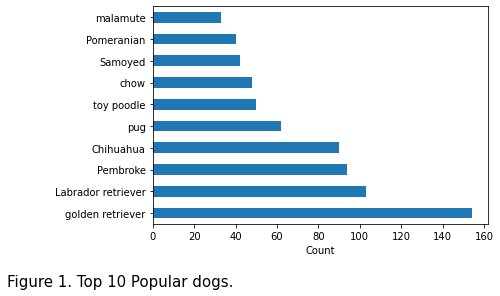

In [69]:
pop_breed.plot(kind = "barh")
plt.xlabel("Count")

txt="Figure 1. Top 10 Popular dogs."
plt.figtext(0.05,-0.09, txt, wrap= True, horizontalalignment="center", fontsize= 15);

In [70]:
# getting the least popular dogs

least_breed = dog_df["breed"].value_counts()[-10:]
least_breed

black-and-tan coonhound    2
Sussex spaniel             2
Appenzeller                2
Japanese spaniel           1
standard schnauzer         1
Bouvier des Flandres       1
EntleBucher                1
Scotch terrier             1
silky terrier              1
Irish wolfhound            1
Name: breed, dtype: int64

In [71]:
# Average ratings of ratings favorite_count and retweet_count 

avg_breed = dog_df.groupby("breed")["ratings","favorite_count","retweet_count"].agg("mean")
avg_breed[:10]

,ratings,favorite_count,retweet_count
breed,,,
Afghan hound,0.966667,17326.666667,5976.000000
Airedale,0.983333,5280.833333,1393.750000
American Staffordshire terrier,1.031250,9380.187500,2310.812500
Appenzeller,1.100000,7317.500000,1458.000000
Australian terrier,1.150000,11127.500000,3078.500000
Bedlington terrier,1.033333,21153.166667,7510.166667
Bernese mountain dog,1.127273,7284.000000,1616.545455
Blenheim spaniel,1.110000,9280.900000,2583.300000
Border collie,1.058333,8933.083333,2207.750000


In [72]:

# for display
def printmd(string):
    display(Markdown(string))
    
    

for col in avg_breed.columns:
    printmd("**Top Breeds based on Average {}**".format(col))
    print(avg_breed.sort_values(by = col, ascending = False)[:10])
    print(" ")
    

**Top Breeds based on Average ratings**

                       ratings  favorite_count  retweet_count
breed                                                        
Bouvier des Flandres  1.300000    18032.000000    4479.000000
Saluki                1.250000    24060.000000    5133.750000
briard                1.233333     9511.666667    2966.666667
Tibetan mastiff       1.225000    12173.500000    4193.000000
Border terrier        1.214286    13578.000000    3377.142857
silky terrier         1.200000     7317.000000    1891.000000
standard schnauzer    1.200000     2046.000000     928.000000
Gordon setter         1.175000     5529.250000    2495.500000
Irish setter          1.175000    10581.750000    3374.000000
Samoyed               1.169048    13902.523810    4843.952381
 


**Top Breeds based on Average favorite_count**

                          ratings  favorite_count  retweet_count
breed                                                           
Saluki                   1.250000    24060.000000    5133.750000
Bedlington terrier       1.033333    21153.166667    7510.166667
French bulldog           1.119355    18416.806452    5039.677419
Bouvier des Flandres     1.300000    18032.000000    4479.000000
Afghan hound             0.966667    17326.666667    5976.000000
black-and-tan coonhound  1.050000    17012.000000    4164.500000
flat-coated retriever    1.087500    16791.625000    4520.250000
Irish water spaniel      1.133333    16400.000000    4500.666667
Leonberg                 1.133333    14934.333333    3863.666667
English springer         1.050000    14138.300000    5401.600000
 


**Top Breeds based on Average retweet_count**

                     ratings  favorite_count  retweet_count
breed                                                      
Bedlington terrier  1.033333    21153.166667    7510.166667
Afghan hound        0.966667    17326.666667    5976.000000
standard poodle     1.072727    13912.818182    5508.909091
English springer    1.050000    14138.300000    5401.600000
Saluki              1.250000    24060.000000    5133.750000
French bulldog      1.119355    18416.806452    5039.677419
cocker spaniel      1.133333    13580.400000    4858.100000
Samoyed             1.169048    13902.523810    4843.952381
whippet             1.018182    12911.454545    4840.272727
Great Pyrenees      1.142857    13117.571429    4784.285714
 


Based on the analysis above, the top 10 popular breeds are not the breeds with top ratings, retweet count and favorite count.
Bouvier des flandres has the highest ratings, Saluki has the highest favorite count and Standard poodle has the highest retweet count. The top ratings, retweet count and favorite count show no relationship with breed popularity as breeds like Black-and-tan coonhound which falls under the least popular breeds has a high favorite count  ranking 5th. 

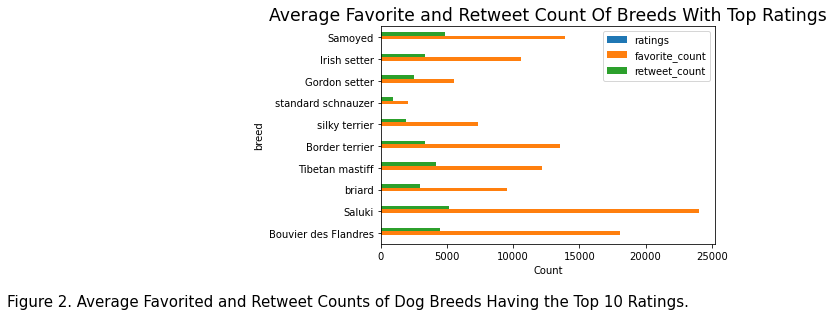

In [73]:
avg_breed.sort_values(by = "ratings", ascending =False)[:10].plot(kind = "barh")

plt.xlabel("Count")
plt.title("Average Favorite and Retweet Count Of Breeds With Top Ratings",fontsize="xx-large")

txt="Figure 2. Average Favorited and Retweet Counts of Dog Breeds Having the Top 10 Ratings."
plt.figtext(0.05,-0.09, txt, wrap= True, horizontalalignment="center", fontsize= 15);

Figure 2 shows that favorite count and retweet count have no relationship with ratings in terms of breeds. Breeds with high ratings do not necessarily have high retweet and favorite count.

In [74]:
dog_df["Age_stage"].value_counts()

pupper          185
doggo            63
puppo            22
floofer           9
pupperdoggo       8
doggopuppo        1
doggofloofer      1
Name: Age_stage, dtype: int64

In [75]:
sum_age = dog_df.groupby("Age_stage")["ratings","favorite_count","retweet_count"].agg("sum")
sum_age

,ratings,favorite_count,retweet_count
Age_stage,,,
doggo,74.8,1128711,408260
doggofloofer,1.1,17169,3433
doggopuppo,1.3,47844,19196
floofer,10.7,99580,37403
pupper,202.7,1396544,473777
pupperdoggo,9.0,104997,35578
puppo,26.3,473127,143265


In [76]:
avg_age = dog_df.groupby("Age_stage")["ratings","favorite_count","retweet_count"].agg("mean")
avg_age

,ratings,favorite_count,retweet_count
Age_stage,,,
doggo,1.187302,17916.047619,6480.317460
doggofloofer,1.100000,17169.000000,3433.000000
doggopuppo,1.300000,47844.000000,19196.000000
floofer,1.188889,11064.444444,4155.888889
pupper,1.095676,7548.886486,2560.956757
pupperdoggo,1.125000,13124.625000,4447.250000
puppo,1.195455,21505.772727,6512.045455


In [77]:
for col in avg_age.columns:
    printmd("**Top Age Stage based on Average {}**".format(col))
    print(avg_age.sort_values(by = col, ascending = False))
    print(" ")

**Top Age Stage based on Average ratings**

               ratings  favorite_count  retweet_count
Age_stage                                            
doggopuppo    1.300000    47844.000000   19196.000000
puppo         1.195455    21505.772727    6512.045455
floofer       1.188889    11064.444444    4155.888889
doggo         1.187302    17916.047619    6480.317460
pupperdoggo   1.125000    13124.625000    4447.250000
doggofloofer  1.100000    17169.000000    3433.000000
pupper        1.095676     7548.886486    2560.956757
 


**Top Age Stage based on Average favorite_count**

               ratings  favorite_count  retweet_count
Age_stage                                            
doggopuppo    1.300000    47844.000000   19196.000000
puppo         1.195455    21505.772727    6512.045455
doggo         1.187302    17916.047619    6480.317460
doggofloofer  1.100000    17169.000000    3433.000000
pupperdoggo   1.125000    13124.625000    4447.250000
floofer       1.188889    11064.444444    4155.888889
pupper        1.095676     7548.886486    2560.956757
 


**Top Age Stage based on Average retweet_count**

               ratings  favorite_count  retweet_count
Age_stage                                            
doggopuppo    1.300000    47844.000000   19196.000000
puppo         1.195455    21505.772727    6512.045455
doggo         1.187302    17916.047619    6480.317460
pupperdoggo   1.125000    13124.625000    4447.250000
floofer       1.188889    11064.444444    4155.888889
doggofloofer  1.100000    17169.000000    3433.000000
pupper        1.095676     7548.886486    2560.956757
 


Pupper which means a dog of younger age have less ratings and retweet and favorite count while the older dogs doggo have high ratings and favorite and retweet count.

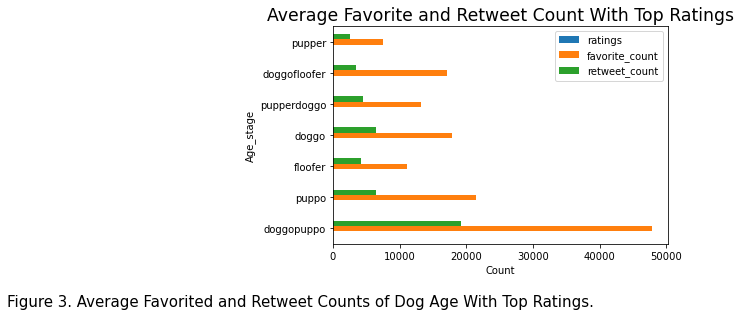

In [78]:
avg_age.sort_values(by = "ratings", ascending =False)[:11].plot(kind = "barh")

plt.xlabel("Count")
plt.title("Average Favorite and Retweet Count With Top Ratings",fontsize="xx-large")

txt="Figure 3. Average Favorited and Retweet Counts of Dog Age With Top Ratings."
plt.figtext(0.05,-0.09, txt, wrap= True, horizontalalignment="center", fontsize= 15);

### Research Question 2<a class= "anchor" id= "Research_2"></a>

In [79]:
dog_df["source"].value_counts()

Iphone       1654
Vine           91
Web            25
TweetDeck       9
Name: source, dtype: int64

In [80]:
dog_df.groupby("source")["ratings", "favorite_count", "retweet_count"].mean()

,ratings,favorite_count,retweet_count
source,,,
Iphone,1.084643,9483.525393,2868.211608
TweetDeck,1.100000,4911.222222,1753.777778
Vine,1.139560,7969.527473,3854.417582
Web,1.040000,5530.720000,2342.000000


In [81]:
dog_df["text_range"].value_counts()

Medium         488
Small          457
Large          430
Extra Large    404
Name: text_range, dtype: int64

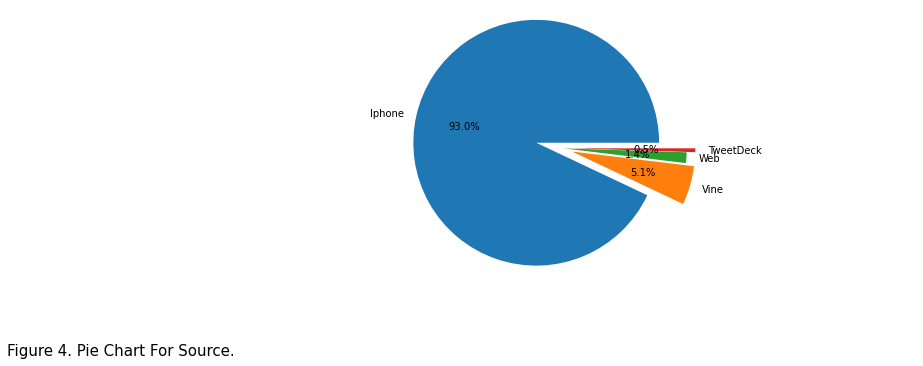

In [82]:
fig1, ax1 =plt.subplots(figsize=(13,5))
labels= ["Iphone","Vine","Web","TweetDeck"]
explode=(0.2,0.1,0.03,0.1)
ax1.pie(dog_df["source"].value_counts(), explode=explode,labels= labels, autopct= "%1.1f%%")
ax1.axis("equal")

txt="Figure 4. Pie Chart For Source."
plt.figtext(0.05,-0.09, txt, wrap= True, horizontalalignment="center", fontsize= 15);

In [83]:
dog_df.groupby("text_range")["ratings", "favorite_count", "retweet_count"].mean()

,ratings,favorite_count,retweet_count
text_range,,,
Extra Large,1.015842,6155.599010,1813.074257
Large,1.071860,9382.334884,2607.279070
Medium,1.115574,11340.477459,3465.194672
Small,1.133260,9930.039387,3554.663020


Small text length get the highest ratings, while medium text length get the highest favorite and retweet count.

In [84]:
dog_df["weekday"].value_counts()

Monday       304
Tuesday      261
Thursday     257
Wednesday    253
Friday       249
Sunday       230
Saturday     225
Name: weekday, dtype: int64

In [85]:
avg_weekday = dog_df.groupby("weekday")[ "favorite_count", "retweet_count"].mean()
avg_weekday

,favorite_count,retweet_count
weekday,,
Friday,9089.220884,2830.004016
Monday,9120.391447,2844.398026
Saturday,9374.435556,3080.351111
Sunday,9094.826087,2755.734783
Thursday,8650.439689,2623.887160
Tuesday,9479.659004,2860.647510
Wednesday,10510.750988,3367.090909


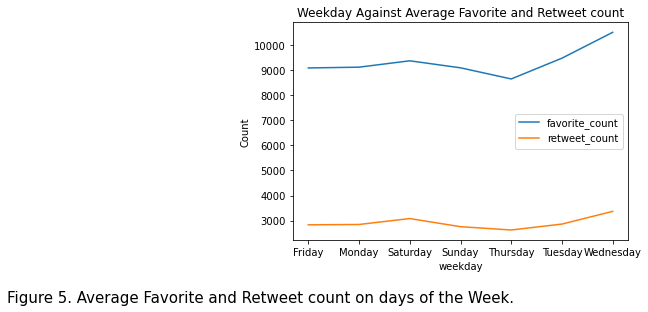

In [86]:
avg_weekday.plot()
plt.ylabel("Count")
plt.title("Weekday Against Average Favorite and Retweet count")


txt="Figure 5. Average Favorite and Retweet count on days of the Week."
plt.figtext(0.05,-0.09, txt, wrap= True, horizontalalignment="center", fontsize= 15);

Wednesday have the highest favorite and retweet count, Tuesday although has the second highest retweet count has an average favorite count.

In [87]:
source_day = dog_df.groupby(["weekday", "source"])["source"].count()
source_day

weekday    source   
Friday     Iphone       225
           Vine           9
           Web           15
Monday     Iphone       276
           TweetDeck      6
           Vine          20
           Web            2
Saturday   Iphone       213
           Vine          12
Sunday     Iphone       220
           Vine           9
           Web            1
Thursday   Iphone       237
           TweetDeck      3
           Vine          13
           Web            4
Tuesday    Iphone       244
           Vine          15
           Web            2
Wednesday  Iphone       239
           Vine          13
           Web            1
Name: source, dtype: int64

In [88]:
text_day = dog_df.groupby(["weekday", "text_range"])["text_range"].count()
text_day

weekday    text_range 
Friday     Extra Large    66
           Large          57
           Medium         74
           Small          52
Monday     Extra Large    66
           Large          77
           Medium         75
           Small          86
Saturday   Extra Large    47
           Large          57
           Medium         62
           Small          59
Sunday     Extra Large    58
           Large          49
           Medium         69
           Small          54
Thursday   Extra Large    55
           Large          56
           Medium         69
           Small          77
Tuesday    Extra Large    57
           Large          64
           Medium         65
           Small          75
Wednesday  Extra Large    55
           Large          70
           Medium         74
           Small          54
Name: text_range, dtype: int64

## Conclusion <a class= "anchor" id= "Conclusion"></a>

This project included the wrangling and analysis of WeRateDogs tweet. The aim of the analysis was to explore the dataset to provide insights on determining factor for good metrics ie high ratings, retweet and favorite counts. High ratings, retweet and favorite count showed no relation with dog breed popularity and with  each other. Tweets with high ratings did not necessarily have high retweet and favorite count. 
Tweet with small text length and tweets made on Wednesday had the good metrics.

#### Limitations <a class="anchor" id="limitation"></a>

* No statistical test was done to back up this findings.
